#National school of sciences and advanced technologies of Borj Cedria
###Deep learning tutorial 2: Larger Convolutional Neural Network for MNIST

Author: **MAAROUFI Sirine 2 TA 1**

# Introduction


# Import Important Libraries

In [ ]:
import keras as k
import tensorflow as tf
import numpy as np
from PIL import Image
from __future__ import print_function
from keras.datasets import mnist
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

# Load and prepare data

In [ ]:
# Split the data between training and testing set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Get the shape of the training data
x_train.shape

(60000, 28, 28)

In [ ]:
# Get the 1st element in the training set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

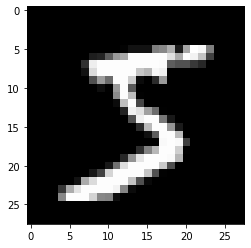

In [ ]:
# Get the first image in the training set
plt.imshow(x_train[0],cmap='gist_gray')

In [ ]:
# Get the shape of the testing set
y_train.shape

(60000,)

In [ ]:
# Get the label of the firt element in the training set
y_train[0]

5

### Normalizing the data
Normalization is scaling the data to be analyzed to a specific range such as [0.0, 1.0] to provide better results.

In [ ]:
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### One Hot Encoding
 One hot encoding is a process of converting categorical data variablesso they can be provided to machine learning algorithms to improve predictions.

In [ ]:
num_classes = 10
num_features = x_train.shape[1]
n_samples = x_train.shape[0]
labels = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
labels.index(y_train[1])

0

In [ ]:
# One hot encode outputs
T_train = np.zeros(shape = (n_samples,num_classes))
for i in range(n_samples):
 ind = labels.index(y_train[i])
 T_train[i,ind] = 1

In [ ]:
T_test = np.zeros(shape = (y_test.shape[0],num_classes))
for i in range(y_test.shape[0]):
 ind = labels.index(y_test[i])
 T_test[i,ind] = 1

In [ ]:
# Image dimensions
img_rows, img_cols = 28, 28
if tf.keras.backend.image_data_format() == 'channels_first':
 x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
 x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
 input_shape = (1, img_rows, img_cols)
else:
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convolution Neural network model
### CNN
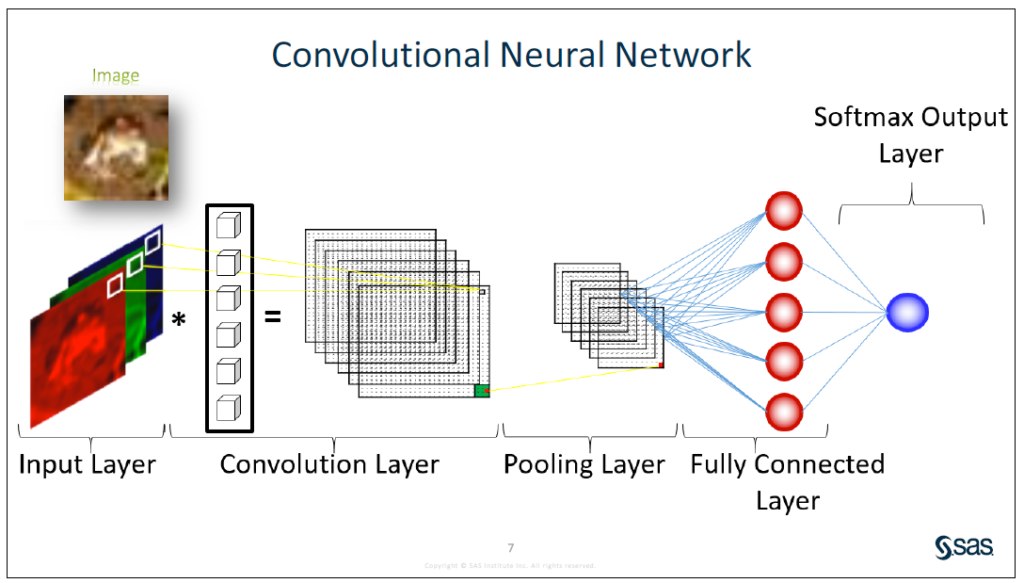
Figure 1: CNN

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:

* Convolutional layer
* Pooling layer
* Fully-connected (FC) layer


The network will be summarized as following.
1. Convolutional layer that contains 32 feature maps with the size 3×3.
2. Convolutional layer that contains 64 feature maps with the size 3×3.  
3. Pooling layer with max over 2*2 patches.
4. Dropout layer that has the probability of 25%.
5. Flatten layer.
6. Fully connected layer that contains 128 neurons.
7. Dropout layer that has a probability of 25%.
8. And finally the output layer.



In [ ]:
Mod1 = Sequential()
Mod1.add(Conv2D(32, kernel_size=(3, 3),
 activation='relu',input_shape=input_shape))
Mod1.add(MaxPooling2D(pool_size=(2, 2)))
Mod1.add(Conv2D(64, (3, 3), activation='relu'))
Mod1.add(MaxPooling2D(pool_size=(2, 2)))
Mod1.add(Dropout(0.25))
# Flatten the images to enter the Neural Networks part of our CNN.
Mod1.add(Flatten())
Mod1.add(Dense(128, activation='relu'))
Mod1.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
Mod1.compile(loss='mean_squared_error',
 optimizer='sgd',
 metrics=['accuracy'])

In [ ]:
# Fitting the model over 3 epochs with a batch size of 60
history = Mod1.fit(x_train,T_train,
                   validation_data = (x_test,T_test),
                   batch_size=30,
                   epochs = 100)

Epoch 1/100
2000/2000 [==============================] - 67s 34ms/step - loss: 0.0893 - accuracy: 0.1999 - val_loss: 0.0885 - val_accuracy: 0.3230
Epoch 2/100
2000/2000 [==============================] - 67s 33ms/step - loss: 0.0875 - accuracy: 0.3120 - val_loss: 0.0855 - val_accuracy: 0.3835
Epoch 3/100
2000/2000 [==============================] - 66s 33ms/step - loss: 0.0820 - accuracy: 0.3783 - val_loss: 0.0742 - val_accuracy: 0.5398
Epoch 4/100
2000/2000 [==============================] - 67s 33ms/step - loss: 0.0624 - accuracy: 0.6019 - val_loss: 0.0422 - val_accuracy: 0.7748
Epoch 5/100
2000/2000 [==============================] - 67s 33ms/step - loss: 0.0391 - accuracy: 0.7435 - val_loss: 0.0255 - val_accuracy: 0.8566
Epoch 6/100
2000/2000 [==============================] - 67s 34ms/step - loss: 0.0287 - accuracy: 0.8093 - val_loss: 0.0189 - val_accuracy: 0.8843
Epoch 7/100
2000/2000 [==============================] - 68s 34ms/step - loss: 0.0237 - accuracy: 0.8428 - val_loss: 0

#### Model Predictions

In [ ]:
pred = Mod1.predict(x_test)
pred[10]

313/313 [==============================] - 4s 12ms/step


array([9.9999315e-01, 1.5816845e-09, 2.2726060e-06, 1.2292120e-09,
       4.5280054e-11, 3.2919147e-07, 3.6043150e-06, 8.7259373e-09,
       5.4677696e-07, 4.2890150e-08], dtype=float32)

In [ ]:
np.argmax(pred[10])

0

In [ ]:
# Display some predictions and the original values
pred_classes = [np.argmax(x) for x in pred]
orig = [np.argmax(x) for x in T_test]
print("Predicted values : ",pred_classes[:20])
print("Original values : ",orig[:20])

Predicted values :  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
Original values :  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


In [ ]:
ERR = []
for i in range(T_test.shape[0]):
 if(pred_classes[i] != orig[i]):
  ERR.append(i)

In [ ]:
# Total number of misclassified
len(ERR)

157

In [ ]:
T_test.shape

(10000, 10)

# Conclusion
CNN is a powerful tool in the field of machine learning. This algorithm fitted on the MNIST data gave an accuracy of 0.9774 and a validation accuracy of 0.9843 as it gave 157 false predictions out of 10000.
